In [2]:
import pandas as pd

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [30]:
final.head()

,artist_song,like,genre,camelot,bpm,energy,danceability,acousticness,happiness,instrumentalness,liveness,speechiness,loudness,year,target
427,백예린 (Yerin Baek) Big world,"194,023",R&B/Soul,11B,130,29,33.0,89.0,30,0.0,10.0,4.0,-11 dB,2022.0,0
428,"이영지 HUG (Feat. Zion.T, 원슈타인) (Prod. by Slom)","48,525",랩/힙합,7B,163,58,66.0,41.0,34,0.0,11.0,38.0,-9 dB,2022.0,0
429,Mingginyu (밍기뉴) 나의 모든 이들에게,"20,364","인디음악, 포크/블루스",11B,86,16,59.0,88.0,59,0.0,12.0,4.0,-7 dB,2022.0,0
430,성시경 아픈 나를 (Prod. By 나얼),"114,170",발라드,8B,137,53,37.0,73.0,25,0.0,9.0,4.0,-6 dB,2022.0,0
431,Seori Cinderella,"24,269",댄스,2B,150,68,73.0,20.0,66,0.0,21.0,20.0,-4 dB,2022.0,0


In [5]:
df=pd.read_csv('./final_chart_out_in.csv',encoding='utf-8-sig')
df

,artist_song,like,genre,camelot,bpm,energy,danceability,acousticness,year,target
0,백예린 (Yerin Baek) Big world,"194,023",R&B/Soul,11B,130,29,33.0,89.0,2022.0,0
1,"이영지 HUG (Feat. Zion.T, 원슈타인) (Prod. by Slom)","48,525",랩/힙합,7B,163,58,66.0,41.0,2022.0,0
2,Mingginyu (밍기뉴) 나의 모든 이들에게,"20,364","인디음악, 포크/블루스",11B,86,16,59.0,88.0,2022.0,0
3,성시경 아픈 나를 (Prod. By 나얼),"114,170",발라드,8B,137,53,37.0,73.0,2022.0,0
4,Seori Cinderella,"24,269",댄스,2B,150,68,73.0,20.0,2022.0,0
...,...,...,...,...,...,...,...,...,...,...
756,아이유 Blueming,"725,837",록/메탈,8B,106,67,82.0,8.0,2024.0,1
757,"MC몽 인기 (Feat. 송가인, 챈슬러)","52,188",랩/힙합,5A,110,87,71.0,17.0,2024.0,1
758,ITZY (있지) ICY,"64,561",댄스,10B,125,90,80.0,3.0,2024.0,1
759,Lil tachi 눈 (Prod. 기리보이),"10,107",랩/힙합,8B,143,65,90.0,19.0,2024.0,1


In [6]:
#결측치 확인후 제거
print(df.isnull().sum())
df.dropna(axis='index',how='any',inplace=True)

artist_song       0
like              0
genre             0
camelot           0
bpm               0
energy            0
danceability      1
acousticness    146
year              0
target            0
dtype: int64


In [203]:
# 거의 1대1로 클래스간 불균형은 없음
np.unique(df['target'],return_counts=True) #[0,1]: [324,290]

(array([0, 1], dtype=int64), array([324, 290], dtype=int64))

In [37]:
#이상치 확인(like는 이상치가 있어도 유의미한 값이라 생각해 유지)
df.max(), df.min() # bpm은 50~204, 나머지 수치형데이터는 0~100사이로 정상범위
np.unique(df['camelot']) #camelot 범주형 데이터는 모두 카멜롯 범위 안

(artist_song             휘인 휘이
 like                   98,923
 genre           포크/블루스, 국내드라마
 camelot                    9B
 bpm                       204
 energy                     97
 danceability             94.0
 acousticness             96.0
 year                   2024.0
 target                      1
 dtype: object,
 artist_song     104 (백사) 그대는 봄인가봐요
 like                         1,081
 genre                        J-POP
 camelot                        10A
 bpm                             50
 energy                           1
 danceability                  22.0
 acousticness                   0.0
 year                        2022.0
 target                           0
 dtype: object)

In [7]:
# like컬럼의 콤마제거 후 숫치화
def comma_remover(x):
    return int(x.replace(',',''))
df['like']=df['like'].apply(comma_remover)  # like는 14에서 725898사이

In [8]:
# 장르는 여러개 존재하는 경우도 있어서 앞의 대표 장르로 통일
import re
def one_genre(x):
    a=re.compile(r'[,].*') #콤마+모든문자 기준
    return re.sub(a,'',x) #콤마포함 콤마이후로 나오는 모든 문자 제거하고 앞의 장르만 남김
df['genre']=df['genre'].apply(one_genre)

In [9]:
# 개수가 적은 장르는 기타장르로 변경
np.unique(df['genre'],return_counts=True) #일렉트로니카, 키즈등의 장르는 수가 너무 작음
df.loc[~df['genre'].isin(['랩/힙합', '발라드', '록/메탈', '댄스', 'R&B/Soul', '인디음악', '성인가요/트로트',
       '포크/블루스']),'genre']='기타' # isin에 들어가지 않은 장르는 기타로

In [10]:
#처리하면서 결측치 생겼는지 확인
df.isnull().sum() # 결측치 없음

artist_song     0
like            0
genre           0
camelot         0
bpm             0
energy          0
danceability    0
acousticness    0
year            0
target          0
dtype: int64

In [51]:
df.to_csv('break_point.csv',encoding='utf-8-sig',index=False)

# ----------------------------------
## 카멜롯 원핫인코딩

In [58]:
# 판다스의 get_dummies로 인코딩
df=pd.get_dummies(df,columns=['camelot'],drop_first=True, dtype='int') # drop_fisrt로 한차원 줄여 23차원으로

# -----------------------------------------------------

In [11]:
# 사인-코사인 인코딩-> 숫자는 각도의 x,y 2차원으로, AB조성은 0 or 1로 -> 23차원대신 3차원으로
def camelot_sin(x):
    angle = 2 * np.pi * (x - 1) / 12  # 12개 키를 0~2π의 각도로 매핑(0:0도, 1π:180도, 2π:360도)
    return np.sin(angle) # 해당 각도의 y좌표 (사인값) 계산.

def camelot_cos(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.cos(angle) # 해당 각도의 x좌표 (코사인값) 계산.

def number(x):
    return int(x[:-1])  #숫자만 가져오기

# apply함수 두번사용하여 숫자만 가져와 사인-코사인 인코딩 함수 적용
df['camelot_sin']=np.round(df['camelot'].apply(number).apply(camelot_sin),2)
df['camelot_cos']=np.round(df['camelot'].apply(number).apply(camelot_cos),2)

In [12]:
# A는 0으로, B는 1로
def get_str(x):
    return 0 if x[-1]=='A' else 1
df['camelot_AB']=df['camelot'].apply(get_str)

In [13]:
# 장르는 원핫인코딩
#df=pd.get_dummies(df,columns=['genre'],drop_first=True,dtype='int') #9개의 장르를 8차원으로

# or label_encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['genre']=le.fit_transform(df['genre'])

In [14]:
# 불필요한 컬럼 제거하고 target컬럼을 맨뒤로
df.drop(columns=['camelot','year'],inplace=True)
df = df[ [col for col in df.columns if col != 'target']+['target'] ]

In [16]:
from sklearn.model_selection import train_test_split
# x, y나누기
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]

# train, test세트 0.2비율로 나누기
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# -----------------------
# SVC용 정규화

In [ ]:
# like가 제일 중요한 변수라 예측되어 로그스켈일링만 진행하여 가중치를 높게 둠
df['like']=df['like'].apply(np.log1p)

# x, y값 가져오고
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]

# train, test세트 0.2비율로 나누기
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# bpm, energy, danceability, acousticness를 standard scailing
ss1=StandardScaler()
ss1.fit(x_train.iloc[:,1:5])
x_train.iloc[:,1:5]=ss1.transform(x_train.iloc[:,1:5])
x_test.iloc[:,1:5]=ss1.transform(x_test.iloc[:,1:5])

# -------------------------

In [213]:
df.to_csv('./final_chart_out_in_preprocessed.csv',encoding='utf-8',index=False)

In [188]:
final

,artist_song,like,genre,camelot,bpm,energy,danceability,acousticness,happiness,instrumentalness,liveness,speechiness,loudness,year,target,camelot_sin,camelot_cos,camelot_AB
427,백예린 (Yerin Baek) Big world,194023,R&B/Soul,11B,130,29,33.0,89.0,30,0.0,10.0,4.0,-11 dB,2022.0,0,-0.87,0.50,1
428,"이영지 HUG (Feat. Zion.T, 원슈타인) (Prod. by Slom)",48525,랩/힙합,7B,163,58,66.0,41.0,34,0.0,11.0,38.0,-9 dB,2022.0,0,0.00,-1.00,1
429,Mingginyu (밍기뉴) 나의 모든 이들에게,20364,인디음악,11B,86,16,59.0,88.0,59,0.0,12.0,4.0,-7 dB,2022.0,0,-0.87,0.50,1
430,성시경 아픈 나를 (Prod. By 나얼),114170,발라드,8B,137,53,37.0,73.0,25,0.0,9.0,4.0,-6 dB,2022.0,0,-0.50,-0.87,1
431,Seori Cinderella,24269,댄스,2B,150,68,73.0,20.0,66,0.0,21.0,20.0,-4 dB,2022.0,0,0.50,0.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,아이유 Blueming,725837,록/메탈,8B,106,67,82.0,8.0,68,0.0,7.0,6.0,-3 dB,2024.0,1,-0.50,-0.87,1
2750,"MC몽 인기 (Feat. 송가인, 챈슬러)",52188,랩/힙합,5A,110,87,71.0,17.0,58,0.0,49.0,6.0,-3 dB,2024.0,1,0.87,-0.50,0
2751,ITZY (있지) ICY,64561,댄스,10B,125,90,80.0,3.0,81,0.0,18.0,8.0,-3 dB,2024.0,1,-1.00,-0.00,1
2752,Lil tachi 눈 (Prod. 기리보이),10107,랩/힙합,8B,143,65,90.0,19.0,71,0.0,8.0,26.0,-4 dB,2024.0,1,-0.50,-0.87,1


In [45]:
df=pd.read_csv('./final_chart_out_in.csv',encoding='utf-8-sig')
#결측치 확인후 제거
#print(df.isnull().sum())
df.dropna(axis='index',how='any',inplace=True)

# 거의 1대1로 클래스간 불균형은 없음
np.unique(df['target'],return_counts=True) #[0,1]: [324,290]

#이상치 확인(like는 이상치가 있어도 유의미한 값이라 생각해 유지)
df.max(), df.min() # bpm은 50~204, 나머지 수치형데이터는 0~100사이로 정상범위
np.unique(df['camelot']) #camelot 범주형 데이터는 모두 카멜롯 범위안

# like컬럼의 콤마제거 후 숫치화
def comma_remover(x):
    return int(x.replace(',',''))
df['like']=df['like'].apply(comma_remover)  # like는 14에서 725898사이

# 장르는 여러개 존재하는 경우도 있어서 앞의 대표 장르로 통일
import re
def one_genre(x):
    a=re.compile(r'[,].*') #콤마+모든문자 기준
    return re.sub(a,'',x) #콤마포함 콤마이후로 나오는 모든 문자 제거하고 앞의 장르만 남김
df['genre']=df['genre'].apply(one_genre)

# 개수가 적은 장르는 기타장르로 변경
np.unique(df['genre'],return_counts=True) #일렉트로니카, 키즈등의 장르는 수가 너무 작음
df.loc[~df['genre'].isin(['랩/힙합', '발라드', '록/메탈', '댄스', 'R&B/Soul', '인디음악', '성인가요/트로트',
       '포크/블루스']),'genre']='기타' # isin에 들어가지 않은 장르는 기타로

In [70]:
df

,artist_song,like,genre,camelot,bpm,energy,danceability,acousticness,year,target
0,백예린 (Yerin Baek) Big world,194023,R&B/Soul,11B,130,29,33.0,89.0,2022.0,0
1,"이영지 HUG (Feat. Zion.T, 원슈타인) (Prod. by Slom)",48525,랩/힙합,7B,163,58,66.0,41.0,2022.0,0
2,Mingginyu (밍기뉴) 나의 모든 이들에게,20364,인디음악,11B,86,16,59.0,88.0,2022.0,0
3,성시경 아픈 나를 (Prod. By 나얼),114170,발라드,8B,137,53,37.0,73.0,2022.0,0
4,Seori Cinderella,24269,댄스,2B,150,68,73.0,20.0,2022.0,0
...,...,...,...,...,...,...,...,...,...,...
756,아이유 Blueming,725837,록/메탈,8B,106,67,82.0,8.0,2024.0,1
757,"MC몽 인기 (Feat. 송가인, 챈슬러)",52188,랩/힙합,5A,110,87,71.0,17.0,2024.0,1
758,ITZY (있지) ICY,64561,댄스,10B,125,90,80.0,3.0,2024.0,1
759,Lil tachi 눈 (Prod. 기리보이),10107,랩/힙합,8B,143,65,90.0,19.0,2024.0,1


In [46]:
df.drop(index=df[(df['target']==0)&(df['genre']=='록/메탈')&(df['like']>10000)].index,inplace=True)

In [159]:
from sklearn.preprocessing import LabelEncoder

In [47]:
# 사인-코사인 인코딩-> 숫자는 각도의 x,y 2차원으로, AB조성은 0 or 1로 -> 23차원대신 3차원으로
def camelot_sin(x):
    angle = 2 * np.pi * (x - 1) / 12  # 12개 키를 0~2π의 각도로 매핑(0:0도, 1π:180도, 2π:360도)
    return np.sin(angle) # 해당 각도의 y좌표 (사인값) 계산.

def camelot_cos(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.cos(angle) # 해당 각도의 x좌표 (코사인값) 계산.

def number(x):
    return int(x[:-1])  #숫자만 가져오기

# apply함수 두번사용하여 숫자만 가져와 사인-코사인 인코딩 함수 적용
df['camelot_sin']=np.round(df['camelot'].apply(number).apply(camelot_sin),2)
df['camelot_cos']=np.round(df['camelot'].apply(number).apply(camelot_cos),2)

# A는 0으로, B는 1로
def get_str(x):
    return 0 if x[-1]=='A' else 1
df['camelot_AB']=df['camelot'].apply(get_str)

# 장르는 원핫인코딩
df=pd.get_dummies(df,columns=['genre'],drop_first=True,dtype='int') #9개의 장르를 8차원으로



# 불필요한 컬럼 제거하고 target컬럼을 맨뒤로
df.drop(columns=['camelot','year'],inplace=True)
df = df[ [col for col in df.columns if col != 'target']+['target'] ]

In [172]:
df.head()

,artist_song,like,genre,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,target
0,백예린 (Yerin Baek) Big world,194023,0,130,29,33.0,89.0,-0.87,0.50,1,0
1,"이영지 HUG (Feat. Zion.T, 원슈타인) (Prod. by Slom)",48525,3,163,58,66.0,41.0,0.00,-1.00,1,0
2,Mingginyu (밍기뉴) 나의 모든 이들에게,20364,7,86,16,59.0,88.0,-0.87,0.50,1,0
3,성시경 아픈 나를 (Prod. By 나얼),114170,5,137,53,37.0,73.0,-0.50,-0.87,1,0
4,Seori Cinderella,24269,2,150,68,73.0,20.0,0.50,0.87,1,0


In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform


In [32]:
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [119]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

In [17]:
from xgboost import XGBClassifier, plot_importance

In [185]:
x_train.isnull

,like,bpm,energy,danceability,acousticness,happiness,instrumentalness,liveness,speechiness,loudness,...,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스
2554,161467,139,38,44.0,70.0,18,0.0,12.0,4.0,-8 dB,...,-1.00,1,0,0,0,0,1,0,0,0
2490,7251,133,50,43.0,4.0,23,0.0,33.0,4.0,-5 dB,...,1.00,1,0,0,0,0,1,0,0,0
2533,49271,125,86,69.0,3.0,54,0.0,17.0,11.0,-4 dB,...,0.50,1,0,1,0,0,0,0,0,0
2664,156346,74,43,52.0,71.0,30,0.0,30.0,3.0,-8 dB,...,-0.87,1,0,0,0,0,0,0,1,0
678,237,154,91,72.0,15.0,66,0.0,9.0,14.0,-3 dB,...,-0.50,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,95396,80,77,70.0,23.0,77,0.0,9.0,7.0,-5 dB,...,-0.50,0,0,0,0,0,0,0,0,0
2479,113964,90,62,49.0,20.0,46,0.0,8.0,24.0,-7 dB,...,-0.00,1,0,0,0,0,0,0,0,0
2539,225911,110,70,81.0,0.0,62,0.0,18.0,4.0,-5 dB,...,-0.87,1,0,0,1,0,0,0,0,0
2522,164256,99,90,69.0,7.0,57,0.0,31.0,6.0,0 dB,...,-0.87,1,0,1,0,0,0,0,0,0


In [48]:
xc=XGBClassifier(objective='binary:logistic',eval_metric='logloss',scale_pos_weight=1.55)
params = {'colsample_bytree': [0.5, 0.7, 1], #각 트리 생성 시 사용하는 feature 비율
                      'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], #값이 낮을수록 학습이 느리지만 일반화 성능 좋음
                      'max_depth' : randint(5,15),
                      'min_child_weight' : [1, 3, 5], #자식 노드 분할을 결정하는 최소 가중치의 합 -> 작으면 더 만흥 자식 노드 분할
                      'n_estimators' : [100, 200, 300,500]}
rs=RandomizedSearchCV(xc,param_distributions=params,n_iter=100,n_jobs=-1)
rs.fit(x_train,y_train)
rs.best_params_, np.max(rs.cv_results_['mean_test_score'])

({'colsample_bytree': 1,
  'learning_rate': 0.01,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators': 200},
 0.7169655741084312)

In [49]:
xc=rs.best_estimator_
xc.score(x_test,y_test)

0.6991869918699187

In [92]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

NameError: name 'roc_auc_score' is not defined

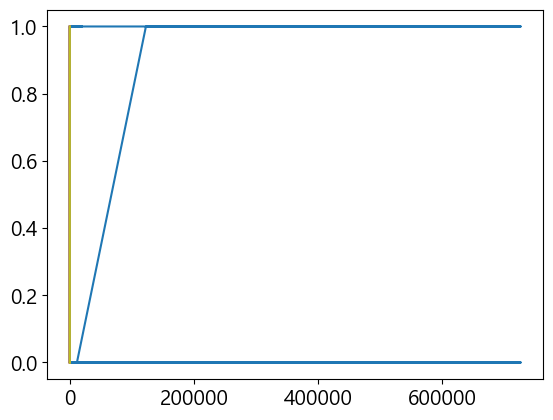

In [23]:
y_pred_proba=xc.predict_proba(x_test)
plt.plot(x,y)
print('auc는: ',roc_auc_score(y_test, cs_y_pred_proba[:,1]))

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

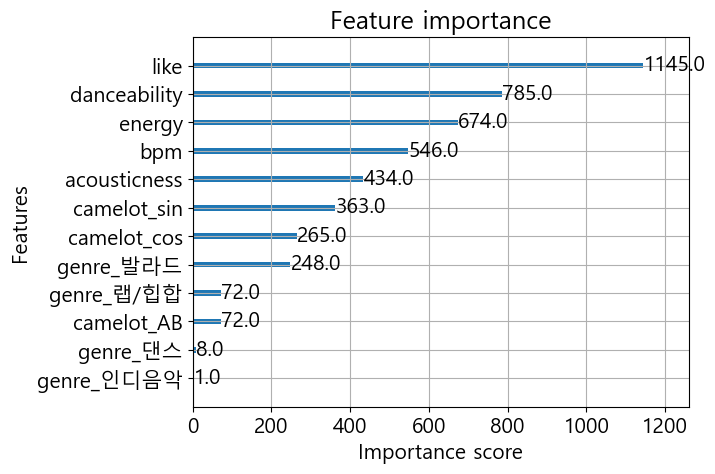

In [50]:
plot_importance(xc)

In [39]:
pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import shap

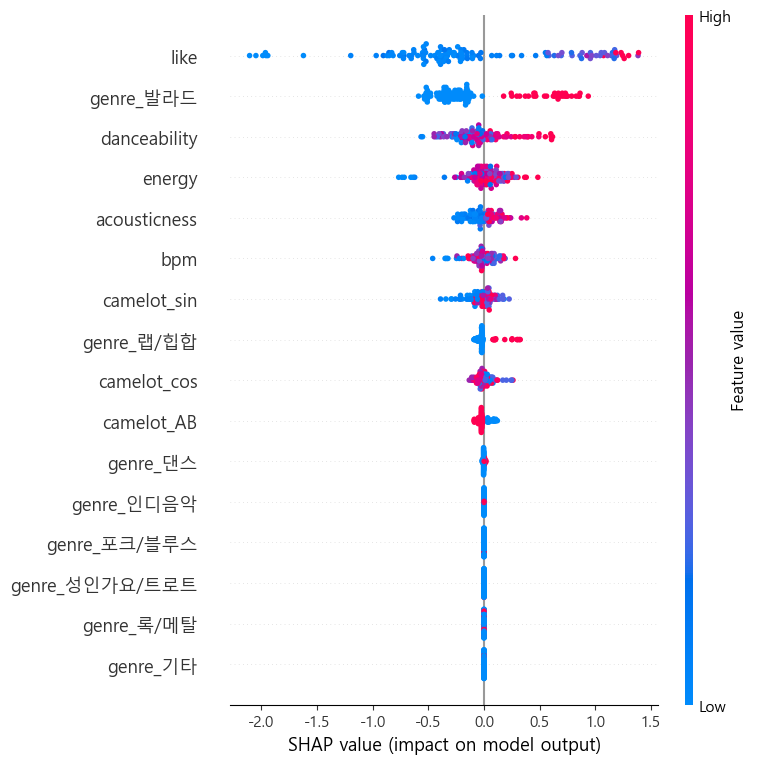

In [51]:
explainer = shap.TreeExplainer(xc)

# SHAP 값 계산 (X_test는 너가 예측하려는 데이터)
shap_values = explainer.shap_values(x_test)

# summary plot (전체 데이터 특성 기여도 + 방향)
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

# 개별 force plot (첫 번째 샘플에 대한 SHAP 값 보기)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], x_test.iloc[0, :], feature_names=x_test.columns)